# Python Homework 3: Monte Carlo Method

The <i>Monte Carlo Method (Monte Carlo Simulation)</i> was first published in 1949 by  Nicholas Metropolis and  Stanislaw Ulam in the work "The Monte Carlo Method" in the <i>Journal of American Statistics Association</i>. The name Monte Carlo has its origins in the fact that Ulam had an uncle who regularly gambled at the Monte Carlo casino in Monaco. In fact, way before 1949 the method had already been extensively used as a secret project of the U.S. Defense Department during the so-called "Manhattan Project". 

The basic principle of the Monte Carlo Method is to implement on a computer the <b>Strong Law of Large Numbers (SLLN)</b>.

If we can generate a sequence $X_1, X_2, X_3, \ldots$ of i.i.d. random variables (i.e., independent and identically distributed) with finite mean $\mathbb{E}[X_1] = \mu$, then the SLLN guarantees that the <i>sample mean</i> (or <i>empirical mean</i>)

$$ \bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n} \longrightarrow \mu \qquad \text{as } n \rightarrow \infty \text{ with probability 1}.$$

In other words, $\bar{X}_n$ is a good approximation for $\mu$ if the number of simulations $n$ is large enough:

$$ \bar{X}_n \approx \mu \qquad \text{for } n \text{ large}.$$

In addition, if we are interested in approximating the probability that some event $A$ occurs, we might adopt the SLLN as follows: We simulate repeated independent trials of a random experiment and define the sequence of random variables $X_1, X_2,\dots$ via

$$ X_i = \begin{cases} 1 & \text{if $A$ occurs on the $i$-th simulation} \\ 0 & \text{if $A$ does not occur on the $i$-th simulation} \end{cases} \qquad (i = 1,2,3,\ldots).$$

Then, $\bar{X}_n$ is the proportion of the $n$ trials in which $A$ occurs. By construction the random variables $X_1, X_2,\dots$ are independent and identically distributed with mean $\mathbb{E}[X_1] = \mathbb{P}[A]$. Thus, by the SLLN we again obtain

$$ \bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n} \longrightarrow \mathbb{P}[A] \qquad \text{as } n \rightarrow \infty \text{ with probability 1},$$

and hence 

$$ \bar{X}_n \approx \mathbb{P}[A] \qquad \text{for } n \text{ large}.$$



As usual, we start with loading some packages:

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# Allows to render plots directly within the notebook
%matplotlib inline

## Problem 1 (5 points)

Consider flipping $n$ times a coin. The probability for heads is given by $p$ where $p$ is some parameter which can be chosen from the interval $(0,1)$. 

Write a Python code to simulate $n$ coin flips with heads probability $p$ and compute the running proportion of heads $\bar{X}_n$ for $n$ running from 1 to 1,000 trials. Plot your results. Your plot should illustrate how the proportion of heads converges to $p$ as $n$ approaches 1,000.

In [9]:
### Insert your code here for simulating the coin flips and for computing the average

def coinflip(p):
    return np.random.binomial(1,p)
#print(coinflip(0.5))

list1=[]

def monte_carlo(n,p):
    results=0
    for i in range(n):
        flip_result = coinflip(p)#1 or 0
        results = results + flip_result #many 1 and 0
        prob_value= results /(i+1)#mean 
        
        list1.append(prob_value)
        
        
        
    return list1
print(monte_carlo(1000,0.25))
    

[0.0, 0.0, 0.3333333333333333, 0.5, 0.4, 0.3333333333333333, 0.2857142857142857, 0.25, 0.2222222222222222, 0.2, 0.18181818181818182, 0.16666666666666666, 0.15384615384615385, 0.21428571428571427, 0.26666666666666666, 0.25, 0.23529411764705882, 0.2222222222222222, 0.2631578947368421, 0.25, 0.23809523809523808, 0.22727272727272727, 0.21739130434782608, 0.25, 0.24, 0.23076923076923078, 0.25925925925925924, 0.25, 0.27586206896551724, 0.3, 0.3225806451612903, 0.3125, 0.30303030303030304, 0.29411764705882354, 0.3142857142857143, 0.3333333333333333, 0.32432432432432434, 0.34210526315789475, 0.358974358974359, 0.35, 0.34146341463414637, 0.35714285714285715, 0.3488372093023256, 0.3409090909090909, 0.3333333333333333, 0.32608695652173914, 0.3191489361702128, 0.3125, 0.30612244897959184, 0.3, 0.29411764705882354, 0.3076923076923077, 0.3018867924528302, 0.2962962962962963, 0.2909090909090909, 0.2857142857142857, 0.2807017543859649, 0.29310344827586204, 0.3050847457627119, 0.3, 0.29508196721311475,

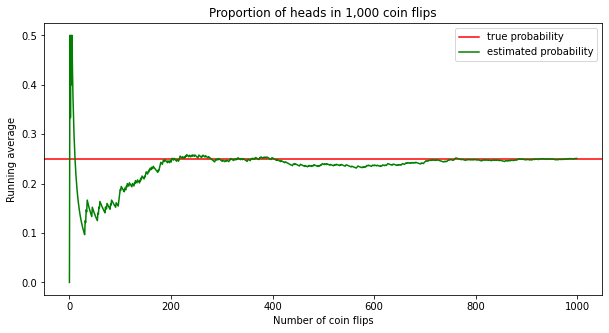

In [7]:
### Complete the plot commands accordingly for also plotting the computed running averages in the graph below

#p = 0.5 # just an example
answer = np.array(monte_carlo(1000,0.25))

plt.figure(figsize=(10,5))
plt.title("Proportion of heads in 1,000 coin flips")
plt.axhline(y=0.25,color="r",linestyle="-",label="true probability")
plt.plot(np.arange(1000),answer*np.ones(1000),'-',color="g",label="estimated probability")#(x,y,type,color,label)
plt.xlabel("Number of coin flips")
plt.ylabel("Running average")
plt.legend(loc="upper right")

## Poblem 2 (5 points)

The Monte Carlo Method is also typically used to numerically compute an approximation of a quantity that is very hard or even impossible to compute like, e.g., integrals. 

Following up on <b>Practice problem 1 on Assignment 4</b>, write a Python code to estimate the irrational number  

$$ \pi = 3.1415926535897932384626433\ldots $$

based on the Monte Carlo Method. Specifically, recall that

$$ \pi = \int_0^1 4 \sqrt{1-x^2} ds$$

and generate a sequence $U_1, U_2, \ldots$ of independent, on $[0,1]$ uniformly distributed random variables to perform your MC estimation.

As in Problem 1 above, plot your estimates for different numbers of simulations $n$ running from 1 to 1,000. Your plot should again illustrate how your estimate appears to converge to $\pi$.

In [5]:
### Implement your MC simulation here
f = lambda x: 4*np.sqrt(1-x**2)
for i in range(0,100):
    u=np.random.uniform(size=1000)
    
def Pi_MC(n):
    
    list1=0
    list2=[]
    for i in range(n):
        #u=np.random.uniform(size=i+1)
        list1=(f(u)[i]+sum(f(u)[0:i]))/(i+1)
        list2.append(list1)
    return np.array(list2)  
#print(Pi_MC(1000))


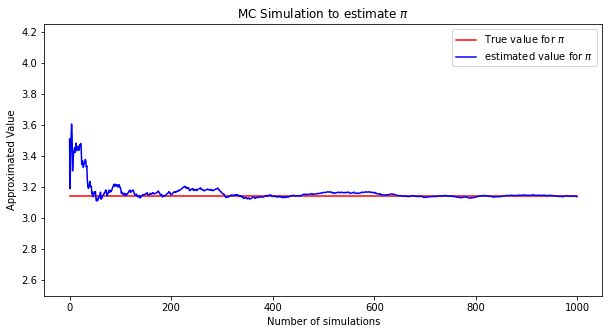

In [37]:
### Complete the plot commands accordingly

list3=Pi_MC(1000)
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_ylim([2.5, 4.25])
plt.title("MC Simulation to estimate $\pi$")
plt.plot(np.arange(1000),np.pi*np.ones(1000),'-',color="red",label="True value for $\pi$") 
plt.plot(np.arange(1000),list3*np.ones(1000),'-',color="blue",label="estimated value for $\pi$") 
plt.xlabel("Number of simulations")
plt.ylabel("Approximated Value")
plt.legend(loc="upper right")

## Problem 3 (fun problem, not graded)

In practice, the tremendous success of the Monte Carlo method is due to the fact that one can design a <i>probabilistic control of the approximation error</i> $ \vert \bar{X}_n - \mu \vert$ which is directly derived from the <b>Central Limit Theorem (CLT)</b>.

Indeed, for any given $\varepsilon > 0$ and large $n$ we get via the CLT that
\begin{align}
\mathbb{P}\left[ \vert \bar{X}_n - \mu \vert \leq \varepsilon \right] & = \mathbb{P}\left[ -\varepsilon \leq \bar{X}_n - \mu \leq + \varepsilon \right] = \mathbb{P}\left[ -\frac{\varepsilon\sqrt{n}}{\sigma} \leq \frac{\sqrt{n} (\bar{X}_n - \mu) }{\sigma} \leq \frac{\varepsilon\sqrt{n}}{\sigma} \right] \\ & \approx \Phi\left(\frac{\varepsilon\sqrt{n}}{\sigma}\right) - \Phi\left(-\frac{\varepsilon\sqrt{n}}{\sigma}\right) = 2 \Phi\left(\frac{\varepsilon\sqrt{n}}{\sigma} \right) - 1,
\end{align}

where $\text{Var}(X_1) = \sigma^2$ denotes the variance and $\Phi$ the CDF of the standard normal distribution.

Now, if we choose $\varepsilon$ such that 

$$ 2 \Phi\left(\frac{\varepsilon\sqrt{n}}{\sigma} \right) - 1 = 1 - \alpha $$

for some $\alpha > 0$ small, which is the case if we set

$$ \varepsilon = \frac{z_{\alpha} \, \sigma}{\sqrt{n}} $$ 

where $z_{\alpha}$ satisfies $\Phi(z_{\alpha}) = 1 - \alpha/2$ ($z_\alpha$ is called $(1-\alpha/2)$-<i>quantile</i> of the standard normal distribution), then

$$ \mathbb{P}\left[ \vert \bar{X}_n - \mu \vert \leq \frac{z_{\alpha} \, \sigma}{\sqrt{n}} \right] = \mathbb{P}\left[ \bar{X}_n -\frac{z_{\alpha} \, \sigma}{\sqrt{n}} \leq  \mu \leq \bar{X}_n + \frac{z_{\alpha} \, \sigma}{\sqrt{n}} \right] \approx 1 - \alpha. $$

In other words: The interval 

$$ \left[ \bar{X}_n - \frac{z_{\alpha} \, \sigma}{\sqrt{n}},  \bar{X}_n + \frac{z_{\alpha} \, \sigma}{\sqrt{n}} \right] $$

is a so-called <b>asymptotic</b> $(1-\alpha)$-<b>confidence interval</b> for the unkown quantity $\mu$ (i.e. <i>approximately</i> with probability $(1-\alpha)$ the unkown $\mu$ lies in this interval if the number of simulations $n$ is very large).

A common choice for $\alpha$ is $\alpha = 0.05$ to get a 95% confidence interval (in this case $z_{\alpha} \approx 1.96$)

<b>But pay attention</b>: Sometimes, we actually do <b>not</b> know the variance $\sigma^2$ of the random variables $X_1, X_2, \ldots$ so that the above confidence interval seems useless in practice since it depends on $\sigma$. Fortunately, we are allowed to replace $\sigma^2$ in the CLT by the <i>sample variance</i> (<i>empirical variance</i>)

$$
\bar{S}_n^2 := \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X}_n)^2
$$

and the statement of the CLT still holds true (it is a more <b>general version of the CLT</b>)! Consequently, with the same reasoning as above we obtain that


$$ \left[ \bar{X}_n - \frac{z_{\alpha} \, \bar{S}_n}{\sqrt{n}},  \bar{X}_n + \frac{z_{\alpha} \, \bar{S}_n}{\sqrt{n}} \right] $$

is an asymptotic $(1-\alpha)$-confidence interval for the unkown quantity $\mu$ without the need to know $\sigma$ (see PSTAT 120B).

Adjust your MC simulation from <b>Problem 2</b> to not only compute $\bar{X}_n$ but to simultaneously also compute the sample variance $\bar{S}_n^2$. Plot your estimates $\bar{X}_n$ for different numbers of used simulations $n$ running from 1 to 10,000 together with the <b>upper</b> and <b>lower</b> bounds of your 95% confidence interval around your estimate $\bar{X}_n$. Your plot should illustrate how your estimate appears to converge to $\pi$ and how the confidence intervals become smaller as $n$ increases.

In [ ]:
### Implement your MC simulation here (Computation of sample mean and sample variance)


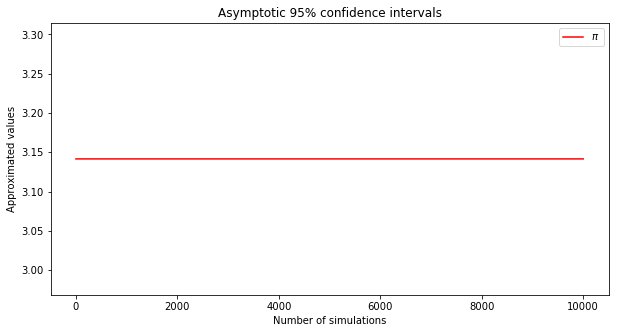

In [6]:
### Complete the plot commands by inserting your estimations for pi 
### and your estimations for the UPPER and LOWER BOUNDS for the 95% confidence intervals

plt.figure(figsize=(10,5))
plt.title("Asymptotic 95% confidence intervals")
plt.plot(np.arange(10000),np.pi*np.ones(10000),'-',color="red",label="$\pi$") 
plt.xlabel("Number of simulations")
plt.ylabel("Approximated values")
plt.legend(loc="upper right")

Note that in the above derivation of the 95% confidence level via the general version of the CLT, we used the fact that

$$ Y_n := \frac{\sqrt{n} \, (\bar{X}_n - \mu)}{\bar{S}_n}$$

is approximately standard normal distributed if $n$ is very large ($\bar{S}_n$ denotes the <i>sample standard deviation</i>).

Simulate the random variable $Y_{5000}$ (with $n=5000$) 5000 times and display the histogram of the samples $Y_{5000}$, along with the probability density function of N(0,1), to check this fact numerically! 

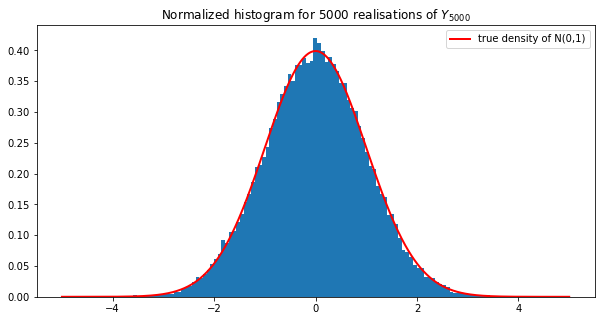

In [8]:
### Complete the plot commands accordingly

I = np.linspace(-5,5,1000) 

s = np.random.normal(0, 1, 50000) # This has to be replaced by simulated values for Y_n

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 5000 realisations of $Y_{5000}$")
plt.hist(s, bins='auto', normed='True')
plt.plot(I, 1/(np.sqrt(2 * np.pi)) * np.exp( - (I)**2 / 2 ), linewidth=2, color='r', label="true density of N(0,1)")
plt.legend()